## Dependencies

### Library Installation (if needed)

In [1]:
#! pip install -qUr requirements.txt

In [2]:
from methods.screener_methods import *
from tqdm import tqdm
import pandas as pd

### Single import

,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,PB Score,...,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,AMBU-B.CO,Ambu A/S,Sell,-0.63,-0.58,-0.05,0.0,-1.17,0.78,-0.19,...,38.79,6.61,2.28,3.91,0.0,0.0,Healthcare,Medical Devices,Denmark,False


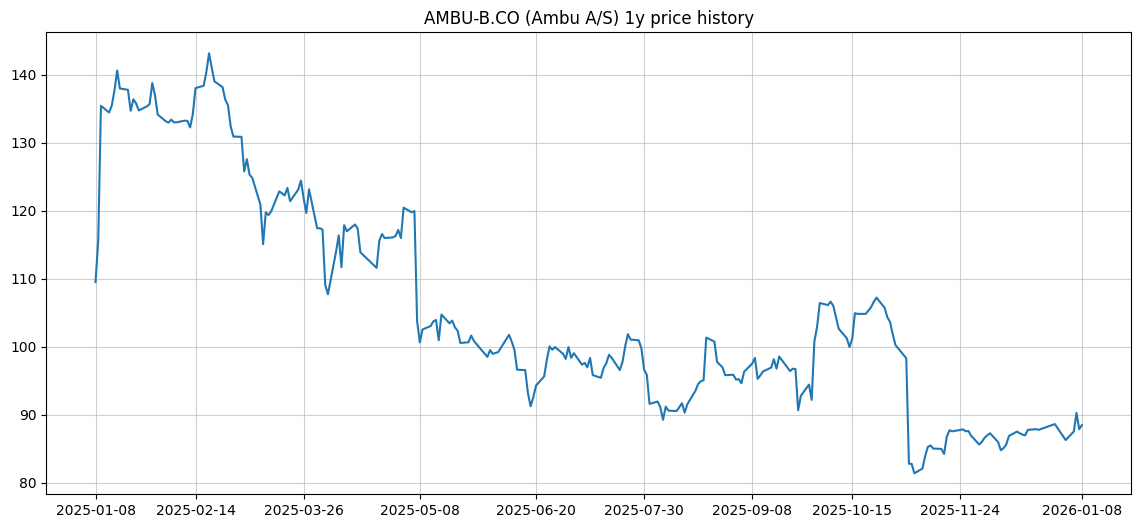

50d Average Change%: 0.000531623


In [ ]:
symbol = "AMBU-B.CO"
stock = Stock(symbol)
display(stock.summary())
stock.price_graph("1y")
print(f"50d Average Change%: {stock.momentum}")


### Screener

In [4]:
symbol_list = "all" #"simple", "danish", "filtered", "all"

if symbol_list == "all":
    symbols = (
        pd.read_csv("../data/tickers/tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()
    )
elif symbol_list == "filtered":
    symbols = pd.read_csv("../data/tickers/screener_filtered_tickers.csv")["Ticker"].tolist()
elif symbol_list == "danish":
    symbols = pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist()
else:
    symbols = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].tolist()
symbols = list(set(symbols))

In [5]:
import sys, io
df = pd.DataFrame()
for symbol in tqdm(symbols, smoothing=0):
    old_stderr = sys.stderr
    sys.stderr = io.StringIO()
    try:
        df = pd.concat([df, Stock(symbol).summary()])
    except Exception:
        pass
    finally:
        sys.stderr = old_stderr
df = df.sort_values(by="Recommendation Score", ascending=False)
display(df)
if symbol_list == "simple":
    df.to_csv("../data/screener_results/simple_screener_results.csv", index=False)
elif symbol_list == "danish":
    df.to_csv("../data/screener_results/danish_screener_results.csv", index=False)
elif symbol_list == "filtered" or symbol_list == "all":   
    df.to_csv("../data/screener_results/screener_results.csv", index=False)
    df["Ticker"].to_csv("../data/tickers/screener_filtered_tickers.csv", index=False)

100%|██████████| 6285/6285 [1:41:19<00:00,  1.03it/s]


,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,PB Score,...,P/E,ROA%,Earnings pr. Share,Price to Book,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,NRT,North European Oil Royality Tru,Buy,2.89,1.75,0.96,0.18,0.95,1.00,-0.20,...,8.66,154.80,0.86,35.31,0.0,0.19,Energy,Oil & Gas E&P,United States,False
0,ESEA,Euroseas Ltd.,Buy,2.79,2.26,0.58,-0.05,1.12,1.00,0.15,...,3.21,12.22,17.38,0.91,0.0,-0.03,Industrials,Marine Shipping,Greece,False
0,DAC,Danaos Corporation,Buy,2.73,2.13,0.53,0.07,1.10,0.85,0.18,...,3.91,7.07,25.14,0.48,0.0,0.04,Industrials,Marine Shipping,Greece,False
0,HLF,Herbalife Ltd.,Buy,2.64,2.29,0.17,0.19,1.09,1.00,0.20,...,4.55,11.72,3.13,-2.40,0.0,0.24,Consumer Defensive,Packaged Foods,United States,False
0,NVAX,"Novavax, Inc.",Buy,2.64,2.31,0.22,0.11,1.11,1.00,0.20,...,3.79,18.01,2.01,-7.90,0.0,0.08,Healthcare,Biotechnology,United States,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,CTW,CTW Cayman,Sell,-2.39,-2.28,-0.01,-0.11,-1.09,-0.99,-0.20,...,32.83,-1.47,0.06,4.27,0.0,-0.07,Communication Services,Electronic Gaming & Multimedia,Japan,False
0,BILI,Bilibili Inc.,Sell,-2.40,-2.28,-0.14,0.02,-1.20,-0.89,-0.20,...,103.42,1.30,0.26,5.26,0.0,0.01,Communication Services,Internet Content & Information,China,False
0,DLR,"Digital Realty Trust, Inc.",Sell,-2.45,-2.18,-0.22,-0.06,-1.18,-0.91,-0.09,...,40.12,1.07,3.86,2.38,-49.7,-0.04,Real Estate,REIT - Specialty,United States,False
0,FMFC,Kandal M Venture Limited,Sell,-2.47,-2.07,-0.19,-0.20,-1.14,-0.73,-0.20,...,36.10,2.31,0.01,15.04,0.0,-0.61,Consumer Cyclical,Footwear & Accessories,Cambodia,False
